### 1.

A partir del dataset mnist (tf.keras.datasets.cifar10.load_data()), realiza una clasificación usando:

** Las imágenes son a color, es decir, tienen 3 dimensiones (rgb). Para este problema, antes de empezar, transforma las imágenes a blanco y negro para que tengan 1 sola dimensión de profundidad **. 

1. Una CNN con:
    - 1 capa convolutiva con 8 neuronas
    - 1 MaxPool quedando las dimensiones de la imagen a la mitad
    - 1 dropout 0.25
    - 1 Flatten
    - 1 dense con 32 neuronas
    - 1 dense con 10 (salida)

2. Una CNN con:
    - 1 capa convolutiva con 8 neuronas
    - 1 MaxPool quedando las dimensiones de la imagen a la mitad
    - 1 dropout 0.25
    - 1 Flatten
    - 1 dense con 16 neuronas
    - 1 dense con 32 neuronas
    - 1 dense con 10 (salida)

¿ Cuál ha dado mejor resultado?

Para compilar el modelo, usa:

In [1]:
import tensorflow as tf
from tensorflow import keras

# Librerias de ayuda
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
data_cifar10 = tf.keras.datasets.cifar10
(train_images, train_labels), (test_images, test_labels) = data_cifar10.load_data()

In [3]:
train_images.shape

(50000, 32, 32, 3)

In [4]:
def grayscale(data, dtype='float32'):
    # luma coding weighted average in video systems
    r, g, b = np.asarray(.3, dtype=dtype), np.asarray(.59, dtype=dtype), np.asarray(.11, dtype=dtype)
    rst = r * data[:, :, :, 0] + g * data[:, :, :, 1] + b * data[:, :, :, 2]
    # add channel dimension
    rst = np.expand_dims(rst, axis=3)
    return rst

train_images_grey = grayscale(train_images)
test_images_grey = grayscale(test_images)


###Otra manera para cambiar las dimensiones. 
###img = numpy.mean(color_img, axis=2)

In [5]:
train_images_grey.shape

(50000, 32, 32, 1)

In [6]:
img_to_show = train_images_grey.reshape(train_images_grey.shape[0], 32, 32)

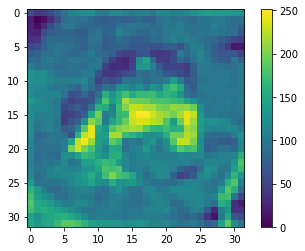

In [7]:

plt.figure()
plt.imshow(img_to_show[0])
plt.colorbar()
plt.grid(False)
plt.show()

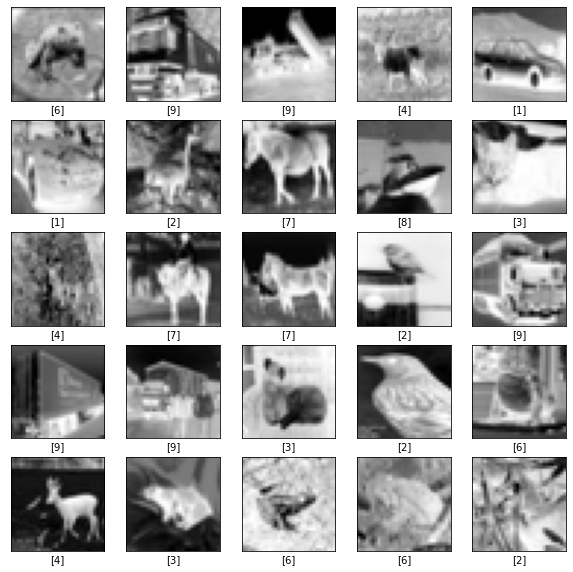

In [8]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(img_to_show[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
plt.show()

In [9]:
train_images_grey = train_images_grey / 255.0

test_images_grey = test_images_grey / 255.0

--------------

1) Una CNN con:

- 1 capa convolutiva con 8 neuronas
- 1 MaxPool quedando las dimensiones de la imagen a la mitad
- 1 dropout 0.25
- 1 Flatten
- 1 dense con 32 neuronas
- 1 dense con 10 (salida)

In [10]:
tf.config.run_functions_eagerly(True)

INPUT_SHAPE = (32,32,1)

model = keras.models.Sequential()

# 1 capa convolutiva con 8 neuronas & 1 MaxPool quedando las dimensiones de la imagen a la mitad
model.add(keras.layers.Conv2D(filters=8, kernel_size=(3, 3), strides=(1, 1), activation="relu", padding="valid", input_shape=INPUT_SHAPE))
model.add(keras.layers.MaxPool2D(pool_size=(2, 2)))

#1 dropout 0.25
model.add(keras.layers.Dropout(rate=0.25))

#1 Flatten
model.add(keras.layers.Flatten())

#1 dense con 32 neuronas
model.add(keras.layers.Dense(units=32, activation="relu"))

# 1 dense con 10 (salida)
model.add(keras.layers.Dense(units=10, activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 8)         80        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 8)         0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 8)         0         
_________________________________________________________________
flatten (Flatten)            (None, 1800)              0         
_________________________________________________________________
dense (Dense)                (None, 32)                57632     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                330       
Total params: 58,042
Trainable params: 58,042
Non-trainable params: 0
____________________________________________________

In [11]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
history = model.fit(train_images_grey, train_labels, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 36s 23ms/step - loss: 1.9737 - accuracy: 0.2831
Epoch 2/10
1563/1563 [==============================] - 38s 24ms/step - loss: 1.7022 - accuracy: 0.3943
Epoch 3/10
1563/1563 [==============================] - 47s 30ms/step - loss: 1.5610 - accuracy: 0.4509
Epoch 4/10
1563/1563 [==============================] - 37s 24ms/step - loss: 1.4906 - accuracy: 0.4796
Epoch 5/10
1563/1563 [==============================] - 42s 27ms/step - loss: 1.4438 - accuracy: 0.4968
Epoch 6/10
1563/1563 [==============================] - 40s 26ms/step - loss: 1.4084 - accuracy: 0.5109
Epoch 7/10
1563/1563 [==============================] - 39s 25ms/step - loss: 1.3856 - accuracy: 0.5191
Epoch 8/10
1563/1563 [==============================] - 39s 25ms/step - loss: 1.3538 - accuracy: 0.5313
Epoch 9/10
1563/1563 [==============================] - 41s 26ms/step - loss: 1.3275 - accuracy: 0.5395
Epoch 10/10
1563/1563 [==============================] - 41s 26m

In [14]:
test_loss, test_acc = model.evaluate(test_images_grey,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 2s - loss: 1.3222 - accuracy: 0.5422

Test accuracy: 0.5422000288963318


-------------------

Una CNN con:
- 1 capa convolutiva con 8 neuronas
- 1 MaxPool quedando las dimensiones de la imagen a la mitad
- 1 dropout 0.25
- 1 Flatten
- 1 dense con 16 neuronas
- 1 dense con 32 neuronas
- 1 dense con 10 (salida)

In [15]:
tf.config.run_functions_eagerly(True)

INPUT_SHAPE = (32,32,1)

model_2 = keras.models.Sequential()

# 1 capa convolutiva con 8 neuronas & 1 MaxPool quedando las dimensiones de la imagen a la mitad
model_2.add(keras.layers.Conv2D(filters=8, kernel_size=(3, 3), strides=(1, 1), activation="relu", padding="valid", input_shape=INPUT_SHAPE))
model_2.add(keras.layers.MaxPool2D(pool_size=(2, 2)))

#1 dropout 0.25
model_2.add(keras.layers.Dropout(rate=0.25))

#1 Flatten
model_2.add(keras.layers.Flatten())


#1 dense con 16 neuronas
model_2.add(keras.layers.Dense(units=16, activation="relu"))

#1 dense con 32 neuronas
model_2.add(keras.layers.Dense(units=32, activation="relu"))

# 1 dense con 10 (salida)
model_2.add(keras.layers.Dense(units=10, activation="softmax"))
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 8)         80        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 8)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 8)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1800)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                28816     
_________________________________________________________________
dense_3 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_4 (Dense)              (None, 10)               

In [18]:
model_2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
history = model_2.fit(train_images_grey, train_labels, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 31s 20ms/step - loss: 1.9277 - accuracy: 0.2898
Epoch 2/10
1563/1563 [==============================] - 28s 18ms/step - loss: 1.6694 - accuracy: 0.4022
Epoch 3/10
1563/1563 [==============================] - 28s 18ms/step - loss: 1.5842 - accuracy: 0.4379
Epoch 4/10
1563/1563 [==============================] - 30s 19ms/step - loss: 1.5185 - accuracy: 0.4635
Epoch 5/10
1563/1563 [==============================] - 35s 22ms/step - loss: 1.4823 - accuracy: 0.4769
Epoch 6/10
1563/1563 [==============================] - 34s 22ms/step - loss: 1.4535 - accuracy: 0.4905
Epoch 7/10
1563/1563 [==============================] - 45s 29ms/step - loss: 1.4275 - accuracy: 0.4962
Epoch 8/10
1563/1563 [==============================] - 51s 33ms/step - loss: 1.4140 - accuracy: 0.5008
Epoch 9/10
1563/1563 [==============================] - 43s 28ms/step - loss: 1.3991 - accuracy: 0.5077
Epoch 10/10
1563/1563 [==============================] - 46s 29m

In [21]:
test_loss, test_acc = model_2.evaluate(test_images_grey,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 2s - loss: 1.3463 - accuracy: 0.5280

Test accuracy: 0.527999997138977


Conclusion:
The second model gives a higher score:   0.527999997138977

-----------------

In [ ]:
### 2.

**BONUS: Entrena la red neuronal 1 pero esta vez con las imágenes a color.**

In [3]:
train_images.shape

(50000, 32, 32, 3)

In [4]:
train_images = train_images / 255.0

test_images = test_images / 255.0

In [5]:
tf.config.run_functions_eagerly(True)

INPUT_SHAPE = (32,32,3)

model_3 = keras.models.Sequential()

# 1 capa convolutiva con 8 neuronas & 1 MaxPool quedando las dimensiones de la imagen a la mitad
model_3.add(keras.layers.Conv2D(filters=8, kernel_size=(3, 3), strides=(1, 1), activation="relu", padding="valid", input_shape=INPUT_SHAPE))
model_3.add(keras.layers.MaxPool2D(pool_size=(2, 2)))

#1 dropout 0.25
model_3.add(keras.layers.Dropout(rate=0.25))

#1 Flatten
model_3.add(keras.layers.Flatten())

#1 dense con 32 neuronas
model_3.add(keras.layers.Dense(units=32, activation="relu"))

# 1 dense con 10 (salida)
model_3.add(keras.layers.Dense(units=10, activation="softmax"))
model_3.summary()

Model: &quot;sequential&quot;
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 8)         224       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 8)         0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 8)         0         
_________________________________________________________________
flatten (Flatten)            (None, 1800)              0         
_________________________________________________________________
dense (Dense)                (None, 32)                57632     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                330       
Total params: 58,186
Trainable params: 58,186
Non-trainable params: 0
__________________________________________

In [6]:
model_3.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
history = model_3.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 78s 50ms/step - loss: 1.6482 - accuracy: 0.4120
Epoch 2/10
1563/1563 [==============================] - 78s 50ms/step - loss: 1.3851 - accuracy: 0.5102
Epoch 3/10
1563/1563 [==============================] - 79s 51ms/step - loss: 1.3158 - accuracy: 0.5366
Epoch 4/10
1563/1563 [==============================] - 76s 48ms/step - loss: 1.2725 - accuracy: 0.5528
Epoch 5/10
1563/1563 [==============================] - 74s 48ms/step - loss: 1.2458 - accuracy: 0.5612
Epoch 6/10
1563/1563 [==============================] - 74s 48ms/step - loss: 1.2224 - accuracy: 0.5703
Epoch 7/10
1563/1563 [==============================] - 75s 48ms/step - loss: 1.2030 - accuracy: 0.5742
Epoch 8/10
1563/1563 [==============================] - 92s 59ms/step - loss: 1.1874 - accuracy: 0.5819
Epoch 9/10
1563/1563 [==============================] - 77s 49ms/step - loss: 1.1723 - accuracy: 0.5880
Epoch 10/10
1563/1563 [==============================] - 77s 49m

In [9]:
test_loss, test_acc = model_3.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 7s - loss: 1.1817 - accuracy: 0.5840

Test accuracy: 0.5839999914169312
